# Assignment 4 : Sentiment Analysis using Azure Resources

### AIDI 1006 (AI Infrastructure and Architecture)

### Sung Gil Kim


This project analyzes customer sentiment by scrapping Amazon product reviews about a baseball bat product in this case. The analysis result can be used for marketing purposes, etc.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#### Read review data from csv file

In [2]:
input_file = 'data.csv'

#Display the first 5 rows of our CSV to inspect
data = pd.read_csv(input_file)
data.head()

,title,content,date,variant,images,verified,author,rating,product,url
0,Nice weight,This bat was a quick replacement for a 220 dol...,26 Sep 2021,"Size\r\n\r\n\r\n\r\n\r\n\r\n: 27""/16oz",NaN,Verified Purchase,Sarah Bereziuk,4.0 out of 5 stars,"EASTON Quantum -11, -5 USA Youth Baseball Bat,...",https://www.amazon.ca/Baseball-Aluminum-Lightw...
1,NaN,DO NOT BUY!!!! The bat is bent after 2 weeks....,17 May 2021,"Size\r\n\r\n\r\n\r\n\r\n\r\n: 26""/15oz",NaN,Verified Purchase,SolidRock123,NaN,"EASTON Quantum -11, -5 USA Youth Baseball Bat,...",https://www.amazon.ca/Baseball-Aluminum-Lightw...
2,NaN,I'm old school...OK...I'm just old. I had nev...,06 Apr 2022,"Size\r\n\r\n\r\n\r\n\r\n\r\n: 27""/16oz",NaN,Verified Purchase,SteBoGo,NaN,"EASTON Quantum -11, -5 USA Youth Baseball Bat,...",https://www.amazon.ca/Baseball-Aluminum-Lightw...
3,NaN,Bat was purchased for my smaller-than-average ...,14 Mar 2022,"Size\r\n\r\n\r\n\r\n\r\n\r\n: 26""/15oz",NaN,Verified Purchase,Babe Ruth,NaN,"EASTON Quantum -11, -5 USA Youth Baseball Bat,...",https://www.amazon.ca/Baseball-Aluminum-Lightw...
4,NaN,The bat cracked after two weeks of modest use ...,23 May 2021,"Size\r\n\r\n\r\n\r\n\r\n\r\n: 26""/15oz",NaN,Verified Purchase,TC,NaN,"EASTON Quantum -11, -5 USA Youth Baseball Bat,...",https://www.amazon.ca/Baseball-Aluminum-Lightw...


In [15]:
data.shape

(10, 10)

In [16]:
review_content = data['content']
print(review_content.head())

0    This bat was a quick replacement for a 220 dol...
1    DO NOT BUY!!!!  The bat is bent after 2 weeks....
2    I'm old school...OK...I'm just old.  I had nev...
3    Bat was purchased for my smaller-than-average ...
4    The bat cracked after two weeks of modest use ...
Name: content, dtype: object


#### review contents cleaning

In [17]:
#Removing \r and \n characters from strings
review_content = review_content.str.replace("\r","")
review_content = review_content.str.replace("\n","")
#Display top 5 rows and the overall length of the series
print(review_content.head())
print('\n')
print("Current review_content count:",review_content.shape)

0    This bat was a quick replacement for a 220 dol...
1    DO NOT BUY!!!!  The bat is bent after 2 weeks....
2    I'm old school...OK...I'm just old.  I had nev...
3    Bat was purchased for my smaller-than-average ...
4    The bat cracked after two weeks of modest use ...
Name: content, dtype: object


Current review_content count: (10,)


In [20]:
for row in review_content:
    print("\n",row)


 This bat was a quick replacement for a 220 dollar Easton Beast bat that had the weight fall out near the end of the season.  So far my son likes the weight of the bat.  Doesn’t look as cool, but so far it does the job and he likes it.  10 yr. old user. 27 in.

 DO NOT BUY!!!!  The bat is bent after 2 weeks.  My 7 year old son was using this bat in his 4th game tonight and the coach noticed it was bent.  Do disappointed because we have another playoff game tomorrow night!  Not what I expected from the Easton brand!

 I'm old school...OK...I'm just old.  I had never used an aluminum bat before and when they came out I just refused to use one in my softball leagues. I got this one by request for my grandson.  Throwing and catching is not his thing but now, I must admit, he can hit and hit deep.  I'm in no position to argue with success so I guess I'll just have to make my peace with the reality of aluminum or whatever this thing is made of.

 Bat was purchased for my smaller-than-averag

In [24]:
type(review_content)

pandas.core.series.Series

In [66]:
senti_list = []

for nrow in range(len(review_content)):

    review_text = review_content[nrow]
    review = {"id": str(nrow), "text": review_text}
    senti_list.append(review)


In [67]:
type(senti_list)

list

In [68]:
type(senti_list[0])

dict

In [69]:
print("review data count : ",len(senti_list))

review data count :  10


#### Conect to Cognitive Services Resource

In [34]:
cog_key = 'f7a12e2d8adf4211b681a9eabc7a6af2'
cog_endpoint = 'https://cognitiveservices-steve.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://cognitiveservices-steve.cognitiveservices.azure.com/ using key f7a12e2d8adf4211b681a9eabc7a6af2


To use the Text Analytics service in your Cognitive Services resource, you'll need to install the Azure Cognitive Services Text Analytics SDK. 

In [32]:
#! pip install azure-cognitiveservices-language-textanalytics

#### Performing Sentiment Analysis

In [35]:
import os
from azure.cognitiveservices.language.textanalytics import TextAnalyticsClient
from msrest.authentication import CognitiveServicesCredentials

# Get a client for your text analytics cognitive service resource
text_analytics_client = TextAnalyticsClient(endpoint=cog_endpoint,
                                            credentials=CognitiveServicesCredentials(cog_key))

In [95]:
# Use the client and reviews you created previously to get sentiment scores
sentiment_analysis = text_analytics_client.sentiment(documents=senti_list)

senti_results_count = {'positive':0,'neutral':0,'negative':0}
    
senti_results_list = []
    
# Print the results for each review
for review_num in range(len(senti_list)):

    # Get the sentiment score for this review
    sentiment_score = sentiment_analysis.documents[review_num].score 
    
    # classifiy 'positive' if more than 0.7, 
    if sentiment_score < 0.3:
        sentiment = 'negative'
        senti_results['negative'] += 1
    elif sentiment_score < 0.7:
        sentiment = 'neutral'
        senti_results['neutral'] += 1
    else:
        sentiment = 'positive'
        senti_results['positive'] += 1

    print('{} : {} ({})'.format(review_num, sentiment, sentiment_score))
    senti_results_list.append(sentiment)

print("\n",senti_results_count)
print(senti_results_list)

0 : positive (0.843346357345581)
1 : neutral (0.5)
2 : positive (0.9298926591873169)
3 : positive (0.9500777125358582)
4 : negative (0.009666889905929565)
5 : positive (0.9900709390640259)
6 : positive (0.9869824051856995)
7 : positive (0.9264447093009949)
8 : positive (0.9999284744262695)
9 : positive (0.9380625486373901)

 {'positive': 0, 'neutral': 0, 'negative': 0}
['positive', 'neutral', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive']


#### Extract Key Phrases

In [96]:
# Use the client and reviews you created in the previous code cell to get key phrases
key_phrase_analysis = text_analytics_client.key_phrases(documents=senti_list)
key_phrase_list = []
 
# print key phrases for each review
for review_num in range(len(senti_list)):
    # print the review id
    print(senti_list[review_num]['id'])

    # Get the key phrases in this review
    print('\nKey Phrases:')
    key_phrases = key_phrase_analysis.documents[review_num].key_phrases
    
    key_phrase_list.append(key_phrases)
    
    # Print each key phrase
    for key_phrase in key_phrases:
        print('\t', key_phrase)
    print('\n')

0

Key Phrases:
	 weight
	 dollar Easton Beast bat
	 quick replacement
	 end
	 old user
	 season
	 job


1

Key Phrases:
	 bat
	 game tonight
	 playoff game tomorrow night
	 year old son
	 coach
	 Easton brand
	 weeks


2

Key Phrases:
	 thing
	 reality of aluminum
	 aluminum bat
	 old school
	 peace
	 softball leagues
	 request
	 grandson
	 position
	 success


3

Key Phrases:
	 couple of batting practice sessions
	 defective unit
	 big dent
	 year-old son
	 balls
	 park
	 replacement


4

Key Phrases:
	 weeks of modest use
	 yr old
	 bat


5

Key Phrases:
	 minutes of ordering
	 item
	 year old
	 Bat
	 confirmation
	 hours


6

Key Phrases:
	 year old
	 couple days


7

Key Phrases:
	 son
	 bat good


8

Key Phrases:
	 great bat
	 quality bat
	 nice youth bat
	 bats
	 lot of kids
	 hardball divisions
	 hard balls
	 hard ball divisions struggle
	 price point
	 drop
	 length
	 use
	 nice quality aluminum
	 great option
	 t-ball
	 legitimate hardball
	 years old
	 average size
	 strengt

In [97]:
key_phrase_list

[['weight',
  'dollar Easton Beast bat',
  'quick replacement',
  'end',
  'old user',
  'season',
  'job'],
 ['bat',
  'game tonight',
  'playoff game tomorrow night',
  'year old son',
  'coach',
  'Easton brand',
  'weeks'],
 ['thing',
  'reality of aluminum',
  'aluminum bat',
  'old school',
  'peace',
  'softball leagues',
  'request',
  'grandson',
  'position',
  'success'],
 ['couple of batting practice sessions',
  'defective unit',
  'big dent',
  'year-old son',
  'balls',
  'park',
  'replacement'],
 ['weeks of modest use', 'yr old', 'bat'],
 ['minutes of ordering', 'item', 'year old', 'Bat', 'confirmation', 'hours'],
 ['year old', 'couple days'],
 ['son', 'bat good'],
 ['great bat',
  'quality bat',
  'nice youth bat',
  'bats',
  'lot of kids',
  'hardball divisions',
  'hard balls',
  'hard ball divisions struggle',
  'price point',
  'drop',
  'length',
  'use',
  'nice quality aluminum',
  'great option',
  't-ball',
  'legitimate hardball',
  'years old',
  'average 

#### Visualization

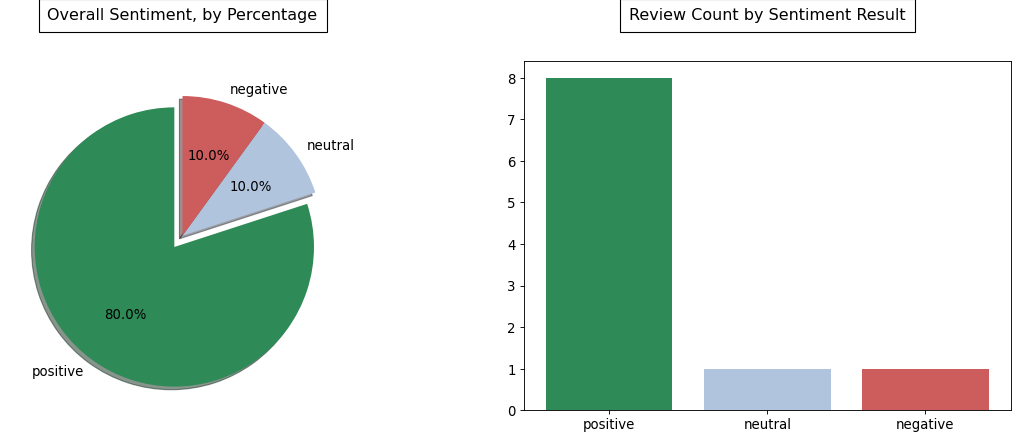

In [88]:
#Setting our Key/Value pairs from our results
keys = senti_results.keys()
values = senti_results.values()
#Establishing some format changes for our charts
figure(num=None, figsize=(8,8),dpi=80)
colors = ['seagreen','lightsteelblue','indianred']
explode = (0.1, 0, 0)
plt.rcParams.update({'font.size': 12})
#Creating the first plot (pie chart)
plt.subplot(221)
plt.pie(values,labels=keys,colors=colors, explode=explode,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Overall Sentiment, by Percentage',bbox={'facecolor':'1','pad':8},y=1.10)
#Creating the second plot (bar chart)
plt.subplot(222)
plt.title('Review Count by Sentiment Result',bbox={'facecolor':'1','pad':8},y=1.10)
plt.bar(keys,values,width=.8,color=colors)
#Adjusting the spacing/padding between subplots
plt.subplots_adjust(left=0.125, bottom=0.1, right=1.8, top=1.3, wspace=0.2, hspace=0.2)
#Displaying the plots
plt.show()

#### Write data to csv file

In [135]:
import csv
import pandas as pd
    
dic = {'content':senti_list, 'sentiment':senti_results_list, 'phrases':key_phrase_list}
dataframe = pd.DataFrame(dic)    

dataframe.to_csv('review_data_sentiment.csv')

In [136]:
dataframe

,content,sentiment,phrases
0,"{'id': '0', 'text': 'This bat was a quick repl...",positive,"[weight, dollar Easton Beast bat, quick replac..."
1,"{'id': '1', 'text': 'DO NOT BUY!!!! The bat i...",neutral,"[bat, game tonight, playoff game tomorrow nigh..."
2,"{'id': '2', 'text': 'I'm old school...OK...I'm...",positive,"[thing, reality of aluminum, aluminum bat, old..."
3,"{'id': '3', 'text': 'Bat was purchased for my ...",positive,"[couple of batting practice sessions, defectiv..."
4,"{'id': '4', 'text': 'The bat cracked after two...",negative,"[weeks of modest use, yr old, bat]"
5,"{'id': '5', 'text': 'Had shipping confirmation...",positive,"[minutes of ordering, item, year old, Bat, con..."
6,"{'id': '6', 'text': 'Bought for my 8 year old....",positive,"[year old, couple days]"
7,"{'id': '7', 'text': 'My son loved this bat goo...",positive,"[son, bat good]"
8,"{'id': '8', 'text': 'This is a really nice you...",positive,"[great bat, quality bat, nice youth bat, bats,..."
9,"{'id': '9', 'text': 'While I don't necessarily...",positive,"[better equipment, idea of better tech, little..."
